In [1]:
# To do
# Load beers in
# Run nltk on the beers to get frequency counts

# Get list of keywords for each beer
# Store data in easily reachable way
# Run tf-idf to get list of keywords
# Compare each list of words for each beer by clustering. PCA and not kmeans?
# Get clusters and store them in an easily accessible way
# Input a beer and get the keywords for that beer OR input a list of keywords to match to.

import re
import json
import nltk
import numpy as np
import pandas as pd
import string
from collections import OrderedDict
from nltk.corpus import stopwords

In [3]:
beer1 = pd.read_csv('../beers/SamuelAdamsWinterLager.csv')
wordlist = beer1['words'][0].split(',')
words = [wordlist[t].translate(wordlist[t].maketrans("","", string.punctuation)) for t in range(len(wordlist))]
words = [x.strip(' ') for x in words]

In [4]:
sr = stopwords.words('english')
clean_tokens = words[:]
for token in words:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

old:5
undated:1
notes:10
draft:4
reddishorange:1
seethrough:1
liquid:1
decent:7
offwhite:3
head:39
strong:5
lacing:16
banana:3
bread:10
nose:9
inviting:3
medium:27
mouthfeel:10
taste:34
splits:1
difference:1
macro:2
lager:29
drinkable:4
disappointing:3
nice:43
remember:1
sam:10
adams:17
boston:10
swill:1
alternative:1
bmc:1
seem:3
like:30
much:11
winter:37
nutmeg:8
meh:1
another:4
beer:61
foam:5
glass:24
also:4
find:2
bit:13
sweet:27
side:4
think:2
buy:5
one:14
seasonal:5
selection:1
samuel:10
hops:9
liked:1
drink:6
gloomy:1
incredibly:1
snowy:1
day:6
nothing:9
want:3
stay:1
inside:1
love:4
german:4
well:15
always:2
try:6
least:2
six:3
packs:1
throughout:1
tough:1
around:10
time:7
year:2
either:5
convenience:1
sake:1
im:7
diggin:1
right:5
flavor:26
makes:5
real:3
syrupy:4
soothing:1
rainy:1
basically:2
done:2
red:9
ale:6
look:7
added:2
spices:30
solid:7
pretty:12
unique:3
cant:3
say:4
excellent:2
cold:6
weather:3
brew:16
maybe:6
truly:1
bock:17
pick:4
every:2
glad:1
looking:2
ba:1
revi

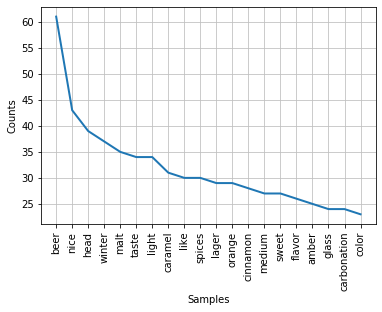

In [5]:
freq.plot(20, cumulative=False)

In [2]:
beers = pd.read_csv('../beers/beers_pt1.csv')
beers['words']

0       ['medium', 'capped', 'version', 'chalice', 'op...
1       ['bottled', 'april', '117th', 'day', 'hoping',...
2       ['12oz', 'bottle', 'first', 'expierence', 'bra...
3       ['notes', 'pours', 'opaque', 'amber', 'clears'...
4       ['bottled', 'drank', 'yarchives', 'semiopaque'...
                              ...                        
2148    ['bottle', 'a', 'poured', 'snifter', 'deep', '...
2149    ['ok', 'may', 'totally', 'fault', 'sept', 'dri...
2150    ['bottle', 'poured', 'goblet', 'clear', 'beaut...
2151    ['red', 'light', 'haze', 'lots', 'champagne', ...
2152    ['clear', 'redamber', 'color', 'light', 'flow'...
Name: words, Length: 2153, dtype: object

In [3]:
def pre_process(text):
    # lowercase
    text=text.lower()
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

beers['words'] = beers['words'].apply(lambda x:pre_process(x)) 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv = CountVectorizer(min_df=0.01, max_df=0.85,stop_words='english')
word_count_vector = cv.fit_transform(beers['words'])
print(np.shape(word_count_vector))
list(cv.vocabulary_.keys())[:10]

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

' favorite straight ale beers tried wellmade wellbalanced beer everything ask dubbel trying stouts great finish evening reviewers seem taste hoppy nature dubbel noticeable all well done guys hold traditional beer areas interesting find get syrupy many strong qualities particular dubbel least gets close achieving difficult brother josephs dubbel clearly lacks sophistication makes ground heart big thanks richj tasty sta treat pours cordovan righteous dollop beige foam head pretty quick kick thick looking beer glows glass brown bread ripe grapes deep spicy notes touch honey light alcohol notes flavors nose here spicy hop nature amped considerably kind clove note rooty herbal thing mixed together warms fig notes join party sip ends bready malt spicy hop balanced well highly viscous low carb full bodied decent finish bit resin buildup could cleaner prob greatest rep due hoppy nature yet tasty drink recommend esp enjoy already a deep amber rich tan head sticky lacing n malt raisin plums t de

In [48]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [57]:
# Choose a random beer and test this shit
randbeer = np.random.randint(0, len(beers))
beers['words'][randbeer]

# Forgot to account for duplicates. Also there's a better way to do this
beer = beers[beers['name'] == beers['name'][randbeer]]
beerword = beer['words']
beerword = beerword.apply(lambda x:pre_process(x))
test = beerword.tolist()

In [58]:
# you only needs to do this once, this is a mapping of index to 
feature_names=cv.get_feature_names()
 
# get the document that we want to extract keywords from
doc = test[0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
 
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
 
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
#print("\n=====Doc=====")
#print(doc)
print(beer['name'])
print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])


79    Hummingbird
Name: name, dtype: object

===Keywords===
braggot 0.333
vine 0.282
lavender 0.248
honey 0.246
mountain 0.223
potent 0.17
springtime 0.161
kings 0.148
mead 0.144
reckon 0.144


In [30]:
wordlist = beer['words'].tolist()[0].split(' ')
words = [wordlist[t].translate(wordlist[t].maketrans("","", string.punctuation)) for t in range(len(wordlist))]
words = [x.strip(' ') for x in words]
sr = stopwords.words('english')
clean_tokens = words[:]
for token in words:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

:2
oz:23
green:2
pictured:1
golden:14
amber:31
color:41
inch:2
offwhite:14
head:75
nice:65
looking:5
streams:1
carbonation:46
bubbles:6
keep:4
solid:21
smell:17
caramel:53
malts:40
slightly:20
sweet:66
low:5
level:3
earthy:11
hop:28
aroma:32
taste:42
malt:50
base:1
bready:33
cracker:1
leafy:3
come:7
end:11
medium:35
body:36
mouth:5
feel:12
good:56
fizzy:2
helles:8
flavor:49
throughout:6
hi:1
neighbor:2
gansett:12
remember:1
slogan:1
old:3
first:13
saw:2
add:2
back:10
red:3
sox:2
yearbook:1
around:3
late:1
yikes:1
anyhow:1
seen:1
packs:1
cans:6
market:2
basket:2
hmmmm:1
seemed:2
worth:5
shot:2
like:32
maibocks:2
wtf:1
eh:1
poured:32
imperial:2
pint:16
glass:38
clear:26
brew:9
slow:1
steady:1
carbo:1
rich:13
mediumcopper:1
smidge:1
foamy:7
fluffy:5
sticks:2
edges:2
quite:18
nicely:10
toasty:6
bit:35
grassy:17
hopping:1
solidly:1
mostly:3
smooth:14
going:6
touch:12
prickliness:1
subtle:3
sweetness:27
action:1
light:47
hint:13
afterwards:1
notes:35
plus:4
stab:1
spiciness:4
florality:1
lin

adapted:1
taken:1
scream:1
herbalspicy:1
admit:1
breathtaking:1
obvious:1
density:1
firm:1
pineapple:1
nature:1
signs:1
preferred:1
obviously:1
wellmade:1
recommended:1
acquired:1
themaniacalone:1
thank:1
recedes:1
wispy:1
dose:1
blast:1
lends:1
oily:1
filling:1
amazing:1
leaking:1
toward:1
popcorn:1
grasses:2
concise:1
sn:1
washes:1
hitting:1
rolls:1
dries:1
immediatly:1
tothemaniacalone:1
cleanclear:1
quickfoamy:1
onefinger:1
bananna:2
glad:1
gotten:1
chance:1
shogo:1
wanting:1
phil:1
glarus:1
pils:1
showcases:1
taper:1
fade:1
gently:1
sunflower:1
burnt:1
stream:2
feed:1
superb:1
create:1
mouthwatering:1
visual:1
effect:1
shooting:1
brewing:1
indeed:1
allows:1
flower:1
melon:1
combination:1
bite:1
strange:1
sort:1
tame:1
provoked:1
mighty:1
purdy:1


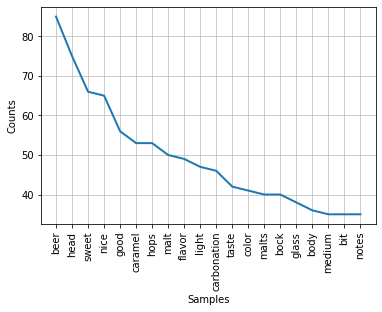

In [31]:
freq.plot(20, cumulative=False)